## Netoyage data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_excel('cars_data.xlsx')
df2 = pd.read_excel('cars2_data.xlsx')
df3= pd.read_excel('cars3_data.xlsx')

In [3]:
df1.shape, df2.shape, df3.shape

((372, 47), (364, 47), (372, 47))

In [4]:
df = pd.concat([df1, df2, df3])

In [71]:
df.shape

(1035, 49)

In [72]:
df.to_excel('Cars_Data.xlsx', index=False)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 371
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Car                         1072 non-null   object 
 1   Kilometres                  1072 non-null   object 
 2   Price                       1072 non-null   object 
 3   Transmission                1072 non-null   object 
 4   Body type                   1072 non-null   object 
 5   Drive type                  1072 non-null   object 
 6   Engine                      1072 non-null   object 
 7   Fuel type                   948 non-null    object 
 8   Fuel consumption            1072 non-null   object 
 9   Colour ext / int            1072 non-null   object 
 10  Registration                1072 non-null   object 
 11  Rego expiry                 1072 non-null   object 
 12  VIN                         1072 non-null   object 
 13  Stock No                    1072 non-nu

In [8]:
df.head()

,Car,Kilometres,Price,Transmission,Body type,Drive type,Engine,Fuel type,Fuel consumption,Colour ext / int,...,Front track,Make,Model,Variant,Series,Warranty when new (months),Warranty when new (kms),Service interval (months),Service interval (kms),Vehicle segment
0,2024 Isuzu MU-X LS-T (4X2),15km,"$63,890",Auto SEQ Sports Mode,"SUV, 4 Doors, 7 Seats",4x2,"4 cyl, 3 L",Diesel,7.80 L / 100 km,Blue / -,...,1570 mm,Isuzu,MU-X,LS-T (4X2),MY24,72.0,"150,000",12.0,"15,000",SUV Large
1,2018 Isuzu MU-X LS-M (4X2),"76,000km","$30,880",Auto Sequential,"SUV, 4 Doors, 7 Seats",4x2,"4 cyl, 3 L",Diesel,8.00 L / 100 km,Silver / -,...,1570 mm,Isuzu,MU-X,LS-M (4X2),UC MY18,60.0,"130,000",12.0,"15,000",SUV Large
2,2021 Isuzu MU-X LS-T (4X4),"64,637km","$50,740",Auto SEQ Sports Mode,"SUV, 4 Doors, 7 Seats",4x4,"4 cyl, 3 L",Diesel,8.30 L / 100 km,Brown / -,...,1570 mm,Isuzu,MU-X,LS-T (4X4),RJ MY21,72.0,"150,000",12.0,"15,000",SUV Large
3,2023 Isuzu MU-X LS-T (4X2),10km,"$59,990",Auto SEQ Sports Mode,"SUV, 4 Doors, 7 Seats",4x2,"4 cyl, 3 L",Diesel,7.80 L / 100 km,White / -,...,1570 mm,Isuzu,MU-X,LS-T (4X2),RJ5 MY23,72.0,"150,000",12.0,"15,000",SUV Large
4,2015 Mitsubishi Outlander Exceed (4X4),"83,365km","$23,990",Continuous Variable,"SUV, 4 Doors, 7 Seats",All Wheel Drive,"4 cyl, 2.4 L",Unleaded Petrol,7.50 L / 100 km,Black / -,...,1540 mm,Mitsubishi,Outlander,Exceed (4X4),ZK MY16,60.0,"130,000",12.0,"15,000",SUV Medium


In [9]:
df.set_index('Car', inplace=True)

In [10]:
df.replace(["-", " "], np.nan, inplace=True)

In [26]:
print(df.dtypes)

Kilometres                    float64
Price                         float64
Transmission                   object
Body type                      object
Drive type                     object
Engine                        float64
Fuel type                      object
Fuel consumption              float64
Colour ext / int               object
Registration                   object
Rego expiry                    object
VIN                            object
Stock No                       object
Seating capacity                int64
Doors                           int64
Front tyre size                object
Front rim size                 object
Rear tyre size                 object
Rear rim size                  object
CC                            float64
Number of cylinders             int64
Front suspension               object
Rear suspension                object
Front brakes                   object
Rear brakes                    object
Fuel tank capacity            float64
Valve gear t

In [32]:
df.iloc[1000]

Kilometres                                      82001.0
Price                                           29950.0
Transmission                        Continuous Variable
Body type                                         SEDAN
Drive type                            Front Wheel Drive
Engine                                              2.5
Fuel type                     Premium Unleaded/Electric
Fuel consumption                                    4.2
Colour ext / int                              White / -
Registration                                      UNREG
Rego expiry                                 17 Nov 2024
VIN                                   JTNBA3HK403001515
Stock No                                          V4584
Seating capacity                                      5
Doors                                                 4
Front tyre size                              215/55 R17
Front rim size                                   7.5x17
Rear tyre size                               215

In [13]:
df['Kilometres'] = df['Kilometres'].str.replace('km', '').str.replace(',', '').astype(float)

In [14]:
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

In [15]:
df['Body type'] = df['Body type'].str.split(',').str[0]

In [16]:
df['Engine'] = df['Engine'].str.split(',').str[1].str.replace(' L', '').astype(float)

In [17]:
df['Fuel consumption'] = df['Fuel consumption'].str.replace(' L / 100 km', '').astype(float)

In [18]:
mean_value = df['Seating capacity'].mean()
df['Seating capacity'].fillna(mean_value, inplace=True)
df['Seating capacity'] = df['Seating capacity'].astype(int)

In [19]:
mean_value = df['Doors'].mean()
df['Doors'].fillna(mean_value, inplace=True)
df['Doors'] = df['Doors'].astype(int)

In [20]:
mean_value = df['Number of cylinders'].mean()
df['Number of cylinders'].fillna(mean_value, inplace=True)
df['Number of cylinders'] = df['Number of cylinders'].astype(int)

In [21]:
columns = ["Ground clearance unladen", "Wheelbase", "Kerb weight", "Turning circle", "Rear track", "Front track"]
for column in columns:
    # Check if the column has a string dtype before using .str accessor
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(' mm', '').str.replace(' kg', '').str.replace(' m', '').astype(float)
    else:
        # Handle the case where the column is already numeric (optional)
        print(f"Column '{column}' is already numeric.")
        # You might want to add some logic here

In [30]:
colrs = df['Colour ext / int'].unique()
print(colrs)

['Blue / -' 'Silver / -' 'Brown / -' 'White / -' 'Black / -' '- / -'
 'Grey / -' 'Green / -' 'Orange / -' 'Red / -' 'Gold / -' 'White / Black'
 'Silver / Black' 'White / Grey' 'Yellow / -' 'Grey / Grey' 'Black / Grey'
 'Black / Black' 'Grey / Black' 'Red / Black' 'Blue / Black'
 'Grey / Beige' 'Blue / Grey' 'Silver / Grey']


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Colour'] = label_encoder.fit_transform(df['Colour ext / int'])

In [27]:
df[['Overall height', 'Overall width', 'Overall length']] = df['Overall HxWxL'].str.replace('mm', '').str.split(' x ', expand=True)

df['Overall height'] = df['Overall height'].astype(float)
df['Overall width'] = df['Overall width'].astype(float)
df['Overall length'] = df['Overall length'].astype(float)

In [29]:
df.drop(columns=['Overall HxWxL'], inplace=True)

In [60]:
df = df.dropna(subset=['Price'])

In [61]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
X = df[numeric_columns]
y = df["Price"]

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
print("Coefficients du modèle:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients du modèle: [ 6.08985402e-17  1.00000000e+00 -6.37956276e-12  2.39543002e-13
 -3.66307832e-13 -3.74909133e-13  5.69885516e-15  1.07345334e-13
 -3.79829299e-13  6.92604792e-14  1.42958857e-14  1.81260889e-14
  1.93654617e-15  8.26675038e-15  1.90413118e-13  7.19079086e-15
  2.50686780e-15 -4.20958841e-14  5.87275657e-14 -3.05311332e-16
 -3.33286458e-15  2.89091667e-15  2.42089606e-14]
Intercept: -2.546585164964199e-11


In [55]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
print("Prédictions:", y_pred)

Prédictions: [ 32995.  58990. 122888.  12990.   7990.  20090.  12950.  39990.  29999.
  16777.  33900.  25990.  28990.  19880.  22999.  39990.  26888.   7999.
  51888.   7490.  39990. 109800.  21990.  62990.  26990.  43990.  20950.
 179888.  12990.  14950.   7888.   9999.  18990.  13999. 237888.  33995.
  10990.  18990.  33888.  16990.  49888.  20990.  76888.  16888.  22990.
  59990.  13990.  16790.   7850.  23990.  16900.  22990.  20999.  26990.
  25999.  23800.  11980.  16990.  28950.   5949.  23990.  25888.  66990.
  32999.  35990.  10950.  11995.   8880.  33999.  27990.  17990.  14999.
   8990.  66990.  11500.  13999.  24800.  14888.  27990.   4990.  16888.
  19990.  24990.  29950.   3999.  14999.  59990.  68887.  34990.  21500.
  20990.  29990.   8995.  39990.  11995.  47490.  11979.  28990.  25888.
  56850.  39800.  46490.  15999.  13997.  25390.  24950.  12999.  13990.
  26990.  19990.  49990.  11999.  23990.  12995.  19990.   3999.  24999.
  18900.  19888.  20880.  19888.  2499

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 5.677675815607031e-23
R²: 1.0


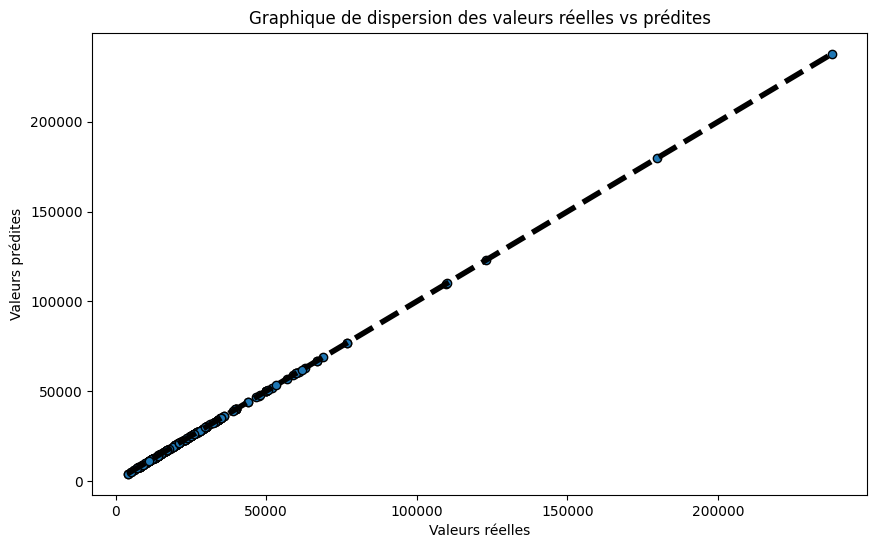

In [57]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion des valeurs réelles vs prédites')
plt.show()

In [68]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

model_svm = SVR(kernel='rbf')
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)


mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM - MSE: {mse_svm}, R²: {r2_svm}")

SVM - MSE: 696855365.2440796, R²: -0.044345345600831365


In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Faire des prédictions
y_pred_knn = model_knn.predict(X_test)

# Calculer les métriques de performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MSE: {mse_knn}, R²: {r2_knn}")

KNN - MSE: 63322552.37294684, R²: 0.9051013795106692
